In [1]:
## import libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from pylab import rcParams
import urllib
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import metrics

In [2]:
address= 'C:/Users/chmat/Desktop/THESIS/Optimization Files/Database1.csv'
bldgs = pd.read_csv(address)
bldgs.columns = ['Number','Label','Stories','ConArea','TotArea','Year','Heater','Sch','Pred Rating','Rating']
print(bldgs)

    Number                                       Label  Stories   ConArea  \
0        1          US+SF+CZ5B+hp+crawlspace+IECC_2021        2   2377.10   
1        2     US+MF+CZ5B+elecres+crawlspace+IECC_2021        3  21609.96   
2        3        US+SF+CZ5B+gasfurnace+slab+IECC_2015        2   2377.10   
3        4                US+SF+CZ5B+hp+slab+IECC_2018        2   2377.10   
4        5                      US+SF+CZ5B + Gas+ 1960        2   2377.10   
5        6          US+SF+CZ5B+hp+crawlspace+IECC_2015        2   2377.10   
6        7          US+SF+CZ5B+hp+crawlspace+IECC_2018        2   2377.10   
7        8                US+SF+CZ5B+hp+slab+IECC_2015        2   2377.10   
8        9                US+SF+CZ5B+hp+slab+IECC_2018        2   2377.10   
9       10                US+SF+CZ5B+hp+slab+IECC_2015        2   2494.67   
10      11        US+SF+CZ5B+gasfurnace+slab+IECC_2021        2   2494.67   
11      12  US+SF+CZ5B+gasfurnace+crawlspace+IECC_2015        2   2377.10   

In [19]:
point = bldgs[['ConArea','Year']]
point = point[0:20]
print(point)

     ConArea  Year
0    2377.10  2021
1   21609.96  2021
2    2377.10  2015
3    2377.10  2018
4    2377.10  1960
5    2377.10  2015
6    2377.10  2018
7    2377.10  2015
8    2377.10  2018
9    2494.67  2015
10   2494.67  2021
11   2377.10  2021
12   2377.10  2018
13  21609.96  2018
14   2377.10  2015
15   2377.10  2015
16   2377.10  2015
17   2377.10  2015
18  21609.96  2015
19  21609.96  2018


In [20]:
##import kmenas
from sklearn.cluster import KMeans

In [32]:
## create kmeans objct 
kmeans = KMeans(n_clusters= 3)

In [33]:
kmeans.fit(point)

KMeans(n_clusters=3)

In [39]:
point['ConArea']

0      2377.10
1     21609.96
2      2377.10
3      2377.10
4      2377.10
5      2377.10
6      2377.10
7      2377.10
8      2377.10
9      2494.67
10     2494.67
11     2377.10
12     2377.10
13    21609.96
14     2377.10
15     2377.10
16     2377.10
17     2377.10
18    21609.96
19    21609.96
Name: ConArea, dtype: float64

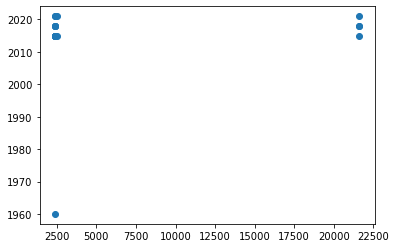

In [40]:
plt.scatter(point['ConArea'],point['Year'])

In [41]:
clusters = kmeans.cluster_centers_

In [42]:
##print out the clusters
print(clusters)

[[ 2377.1         2012.78571429]
 [21609.96        2018.        ]
 [ 2494.67        2018.        ]]


In [43]:
##assigned schedule (0-4)
y_km = kmeans.fit_predict(point)
print(y_km)

[0 1 0 0 0 0 0 0 0 2 2 0 0 1 0 0 0 0 1 1]


In [44]:
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')

# ax.scatter(point[y_km==0,0], point[y_km ==0,1],point[y_km ==0,2], s = 50, color='red' )
# ax.scatter(clusters[0][0],clusters[0][1], clusters[0][2], marker = '*', s = 100, color='black')

# ax.scatter(point[y_km==1,0], point[y_km ==1,1],point[y_km ==1,2] , s = 50, color='blue' )
# ax.scatter(clusters[1][0],clusters[1][1], clusters[1][2], marker = '*', s = 100, color='black')

# ax.scatter(point[y_km==2,0], point[y_km ==2,1], point[y_km ==2,2], s = 50, color='yellow' )
# ax.scatter(clusters[2][0],clusters[2][1], clusters[2][2], marker = '*', s = 100, color='black')

# ax.scatter(point[y_km==3,0], point[y_km ==3,1], point[y_km ==3,2], s = 50, color='cyan' )
# ax.scatter(clusters[3][0],clusters[3][1], clusters[3][2], marker = '*', s = 100, color='black')

# ax.scatter(point[y_km==4,0], point[y_km ==4,1], point[y_km ==4,2],s = 50, color='magenta' )
# ax.scatter(clusters[4][0],clusters[4][1], clusters[4][2], marker = '*', s = 100, color='black')
#plt.show()

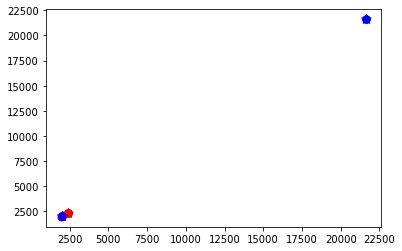

In [47]:
v
plt.scatter(point[y_km==0], point[y_km ==0], s = 50, color='red' )
plt.scatter(clusters[0],clusters[0],marker = '*', s = 100, color='red')

plt.scatter(point[y_km==1], point[y_km ==1], s = 50, color='blue' )
plt.scatter(clusters[1],clusters[1],marker = '*', s = 100, color='blue')

# plt.scatter(point[y_km==2,0], point[y_km ==2,1], s = 50, color='yellow' )
# plt.scatter(clusters[2][0],clusters[2][1],marker = '*', s = 100, color='black')
# plt.scatter(point[y_km==3,0], point[y_km ==3,1], s = 50, color='cyan' )
# plt.scatter(clusters[3][0],clusters[3][1],marker = '*', s = 100, color='black')

Split data into test and training set